In [148]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
import warnings
from sklearn.preprocessing import LabelEncoder
warnings.filterwarnings('ignore')
%matplotlib inline
import time
import os

from sklearn.ensemble import GradientBoostingClassifier

In [103]:
df_train=pd.read_csv('train.csv')
df_test=pd.read_csv('test.csv')

In [104]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


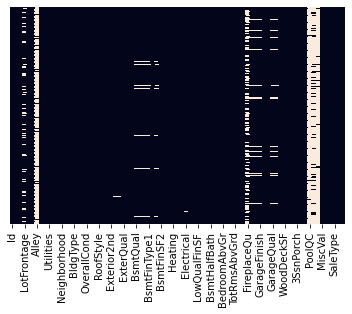

In [105]:
sns.heatmap(df_train.isnull(),yticklabels=False,cbar=False)

In [106]:
## Fill Missing Values of the training file
df_train['LotFrontage']=df_train['LotFrontage'].fillna(df_train['LotFrontage'].mean())

In [107]:
df_train.drop(['Alley'],axis=1,inplace=True)

In [108]:
df_train['BsmtCond']=df_train['BsmtCond'].fillna(df_train['BsmtCond'].mode()[0])
df_train['BsmtQual']=df_train['BsmtQual'].fillna(df_train['BsmtQual'].mode()[0])

In [109]:
df_train['FireplaceQu']=df_train['FireplaceQu'].fillna(df_train['FireplaceQu'].mode()[0])
df_train['GarageType']=df_train['GarageType'].fillna(df_train['GarageType'].mode()[0])

In [110]:
df_train.drop(['GarageYrBlt'],axis=1,inplace=True)

In [111]:
df_train['GarageFinish']=df_train['GarageFinish'].fillna(df_train['GarageFinish'].mode()[0])
df_train['GarageQual']=df_train['GarageQual'].fillna(df_train['GarageQual'].mode()[0])
df_train['GarageCond']=df_train['GarageCond'].fillna(df_train['GarageCond'].mode()[0])

In [112]:
df_train.drop(['PoolQC','Fence','MiscFeature'],axis=1,inplace=True)

In [113]:
df_train.drop(['Id'],axis=1,inplace=True)

In [114]:
df_train['MasVnrArea']=df_train['MasVnrArea'].fillna(df_train['MasVnrArea'].mode()[0])

In [115]:
df_train['BsmtExposure']=df_train['BsmtExposure'].fillna(df_train['BsmtExposure'].mode()[0])

In [116]:
df_train['BsmtFinType2']=df_train['BsmtFinType2'].fillna(df_train['BsmtFinType2'].mode()[0])

In [117]:
df_train.dropna(inplace=True)

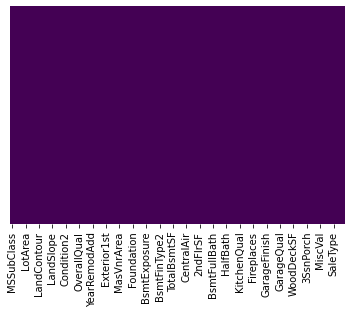

In [118]:
sns.heatmap(df_train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [119]:
## Fill Missing Values of the testing file
df_test['LotFrontage']=df_test['LotFrontage'].fillna(df_test['LotFrontage'].mean())

In [120]:
df_test.drop(['Alley'],axis=1,inplace=True)

In [121]:
df_test['BsmtCond']=df_test['BsmtCond'].fillna(df_test['BsmtCond'].mode()[0])
df_test['BsmtQual']=df_test['BsmtQual'].fillna(df_test['BsmtQual'].mode()[0])

In [122]:
df_test['FireplaceQu']=df_test['FireplaceQu'].fillna(df_test['FireplaceQu'].mode()[0])
df_test['GarageType']=df_test['GarageType'].fillna(df_test['GarageType'].mode()[0])

In [123]:
df_test.drop(['GarageYrBlt'],axis=1,inplace=True)

In [124]:
df_test['GarageFinish']=df_test['GarageFinish'].fillna(df_test['GarageFinish'].mode()[0])
df_test['GarageQual']=df_test['GarageQual'].fillna(df_test['GarageQual'].mode()[0])
df_test['GarageCond']=df_test['GarageCond'].fillna(df_test['GarageCond'].mode()[0])

In [125]:
df_test.drop(['PoolQC','Fence','MiscFeature'],axis=1,inplace=True)

In [126]:
df_test.drop(['Id'],axis=1,inplace=True)

In [127]:
df_test['MasVnrArea']=df_test['MasVnrArea'].fillna(df_test['MasVnrArea'].mode()[0])

In [128]:
df_test['BsmtExposure']=df_test['BsmtExposure'].fillna(df_test['BsmtExposure'].mode()[0])

In [129]:
df_test['BsmtFinType2']=df_test['BsmtFinType2'].fillna(df_test['BsmtFinType2'].mode()[0])

In [130]:
df_test.dropna(inplace=True)

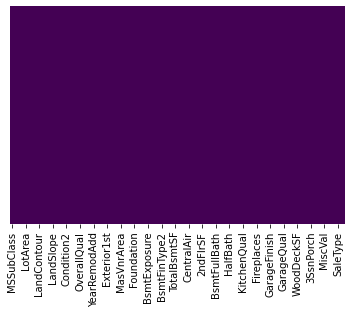

In [131]:
sns.heatmap(df_test.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [93]:
df_train_label = df_train.apply(LabelEncoder().fit_transform)
df_train_label.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,5,3,36,319,1,3,3,0,4,0,...,0,0,0,0,0,1,2,8,4,392
1,0,3,52,488,1,3,3,0,2,0,...,0,0,0,0,0,4,1,8,4,324
2,5,3,39,687,1,0,3,0,4,0,...,0,0,0,0,0,8,2,8,4,421
3,6,3,31,479,1,0,3,0,0,0,...,105,0,0,0,0,1,0,8,0,180
4,5,3,56,907,1,0,3,0,2,0,...,0,0,0,0,0,11,2,8,4,473


In [132]:
columns = ['SalePrice']
y = df_train['SalePrice']
df_train = df_train.drop(columns, axis=1)
X = df_train.apply(LabelEncoder().fit_transform)

In [133]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(class_weight='balanced', multi_class='multinomial', solver='lbfgs')

In [134]:
logreg_scores = cross_val_score(logreg, X, y, cv=10, scoring='accuracy')
print('The accuracy of the logistic Regression classifier with 10 fold cross-validation is ' + str(logreg_scores.mean()))

The accuracy of the logistic Regression classifier with 10 fold cross-validation is 0.0028268904205374086


In [135]:
print(logreg_scores)

[0.         0.00704225 0.00704225 0.         0.         0.
 0.         0.0070922  0.         0.0070922 ]


In [136]:
logreg_cv_mean = np.mean(logreg_scores)
logreg_cv_variance = np.var(logreg_scores)

print('logreg Mean score : ', logreg_cv_mean)
print('logreg Score variance : ', logreg_cv_variance)

logreg Mean score :  0.0028268904205374086
logreg Score variance :  1.1987213625495422e-05


In [137]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier()

In [138]:
forest_scores = cross_val_score(forest, X, y, cv=10, scoring='accuracy')
print('The accuracy of the Random forest classifier with 10 fold cross-validation is ' + str(forest_scores.mean()))

The accuracy of the Random forest classifier with 10 fold cross-validation is 0.009189891119768255


In [139]:
print(forest_scores)

[0.00704225 0.02112676 0.         0.01408451 0.0070922  0.0212766
 0.0212766  0.         0.         0.        ]


In [140]:
forest_cv_mean = np.mean(forest_scores)
forest_cv_variance = np.var(forest_scores)

print('forest Mean score : ', forest_cv_mean)
print('forest Score variance : ', forest_cv_variance)

forest Mean score :  0.009189891119768255
forest Score variance :  8.054520309349854e-05


In [161]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import TimeSeriesSplit
from datetime import datetime
start = datetime.now()


# initialize Our first XGBoost model...
regr = xgb.XGBRegressor(silent=False, random_state=15)
#regr = MultiOutputRegressor(regr1)
# declare parameters for hyperparameter tuning
parameters = {'learning_rate':[0.001,0.01,0.1],'n_estimators':[100,300,500,700],'max_depth':[1,2,3]} 

# Perform cross validation 
clf = GridSearchCV(regr,
                    param_grid = parameters,
                    scoring="neg_mean_squared_error",
                    cv = 5,
                    n_jobs = -1,
                    verbose = 1)
result = clf.fit(X, y)

# Summarize results
print("Best: %f using %s" % (result.best_score_, result.best_params_))
means = result.cv_results_['mean_test_score']
stds = result.cv_results_['std_test_score']
params = result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f 1(%f) with: %r" % (mean, stdev, param))   
    
print("\nTime Taken: ",start - datetime.now())


Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    9.1s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:   32.7s finished


[14:04:37] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


Best: -716470412.550504 using {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 700}
-33084590838.814331 1(1961333616.078591) with: {'learning_rate': 0.001, 'max_depth': 1, 'n_estimators': 100}
-23284986397.618462 1(1644543906.093297) with: {'learning_rate': 0.001, 'max_depth': 1, 'n_estimators': 300}
-16654399699.840185 1(1405811875.367754) with: {'learning_rate': 0.001, 'max_depth': 1, 'n_estimators': 500}
-12140885725.323025 1(1229254445.519264) with: {'learning_rate': 0.001, 'max_depth': 1, 'n_estimators': 700}
-32912696358.857098 1(1932334748.702352) with: {'learning_rate': 0.001, 'max_depth': 2, 'n

In [162]:
xgb1 = xgb.XGBRegressor(max_depth=1,learning_rate = 0.001,n_estimators=100,nthread=-1)
xgb1

XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None, gamma=None,
             gpu_id=None, importance_type='gain', interaction_constraints=None,
             learning_rate=0.001, max_delta_step=None, max_depth=1,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, nthread=-1, num_parallel_tree=None,
             random_state=None, reg_alpha=None, reg_lambda=None,
             scale_pos_weight=None, subsample=None, tree_method=None,
             validate_parameters=None, verbosity=None)

In [166]:
df_test_label = df_test.apply(LabelEncoder().fit_transform)
df_test_label.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,0,2,56,753,1,3,3,0,4,0,...,0,0,0,17,0,0,5,4,8,4
1,0,3,57,932,1,0,3,0,0,0,...,24,0,0,0,0,23,5,4,8,4
2,5,3,50,915,1,0,3,0,4,0,...,22,0,0,0,0,0,2,4,8,4
3,5,3,54,570,1,0,3,0,4,0,...,24,0,0,0,0,0,5,4,8,4
4,11,3,19,118,1,0,1,0,4,0,...,68,0,0,26,0,0,0,4,8,4


In [167]:
y_pred_testf2=clf.predict(df_test_label)

In [168]:

% matplotlib inline
actual_values = y_test
plt.scatter(y_pred_testf2, actual_values, alpha=.75,
            color='b') #alpha helps to show overlapping data
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('XGBoost Model')
overlay = 'RMSE is: {}'.format(
                    
                    mean_squared_error(y_test, y_pred_testf2))
plt.annotate(s=overlay,xy=(12.1,10.6),size='x-large')
plt.show()

UsageError: Line magic function `%` not found.


In [170]:
y_pred = model.predict(X_test)